In [7]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [8]:
res = pd.read_csv("results.csv")
res

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
0,0,052d5_00000,0,1512.822021,bald,1,146819.004333
1,1,052d5_00000,1,1412.573975,bald,1,146819.004333
2,2,052d5_00000,2,1405.119385,bald,1,146819.004333
3,3,052d5_00000,3,1400.824463,bald,1,146819.004333
4,4,052d5_00000,4,1428.069580,bald,1,146819.004333
...,...,...,...,...,...,...,...
5020,5020,052d5_00024,196,544.165710,random,5,121279.501343
5021,5021,052d5_00024,197,552.138794,random,5,121279.501343
5022,5022,052d5_00024,198,558.907349,random,5,121279.501343
5023,5023,052d5_00024,199,546.856934,random,5,121279.501343


In [9]:
res[res.strategy=="random"]

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
4020,4020,052d5_00020,0,1512.822021,random,1,144152.563293
4021,4021,052d5_00020,1,869.602661,random,1,144152.563293
4022,4022,052d5_00020,2,894.595825,random,1,144152.563293
4023,4023,052d5_00020,3,984.456177,random,1,144152.563293
4024,4024,052d5_00020,4,946.216431,random,1,144152.563293
...,...,...,...,...,...,...,...
5020,5020,052d5_00024,196,544.165710,random,5,121279.501343
5021,5021,052d5_00024,197,552.138794,random,5,121279.501343
5022,5022,052d5_00024,198,558.907349,random,5,121279.501343
5023,5023,052d5_00024,199,546.856934,random,5,121279.501343


In [10]:
def format_scientific_tight(value):
    """
    Formats a number using scientific notation without the + sign.
    """
    return f"{value:.2e}".replace('e+0', 'e').replace('e+', 'e')

In [11]:
aucs = res.drop_duplicates(subset=["strategy","seed"])
agg = aucs.groupby("strategy")["score"]
mean_aucs, std_aucs = agg.mean(), agg.std()
aucs = pd.concat((mean_aucs, std_aucs), axis=1)
aucs.columns = ["avg", "stdv"]
aucs["score"] = aucs.apply(lambda row: f"{format_scientific_tight(row.avg)} ± {format_scientific_tight(row.stdv)}"  ,axis=1)
label_to_auc = dict(zip(aucs.index, aucs["score"]))

/var/folders/02/fbyrwz_s7tg4vmbm1kswhxp40000gp/T/ipykernel_34342/3633301443.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([int(label) + 10 for label in current_xticks])


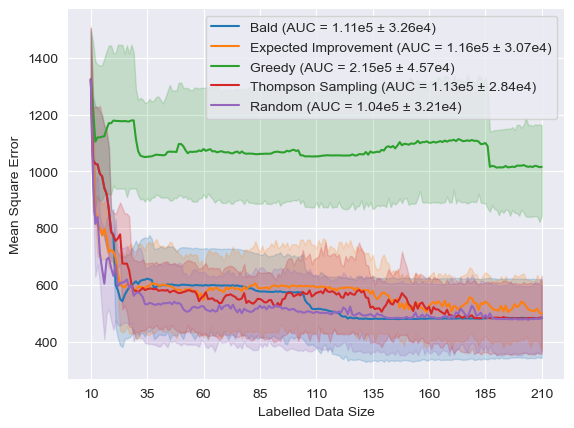

In [12]:
sns.set_style("darkgrid")

sns.lineplot(data=res, x="iteration", y="test_metric", hue="strategy")
plt.ylabel("Mean Square Error")
plt.xlabel("Labelled Data Size")


current_xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels([int(label) + 10 for label in current_xticks])

ax = plt.gca()
legend = ax.get_legend()
for text in legend.get_texts():
    label = text.get_text()
    new_label = f"{label.replace('_', ' ').title()} (AUC = {label_to_auc[label]})"
    text.set_text(new_label)
legend.set_title(None) 
    

for spine in ax.spines.values():
    spine.set_visible(False)